#### Keep it in mind, this method of using Z scores for capping/ trimming the outliers is valid ONLY if the particular feature is normally distributed

#### We should ideally split the dataset into training and testing and then apply the outlier engineering techniques, because we want to keep the test set untouched until the very end.
#### But here, we'll assume that the entire data we have is our train set, and that we have a separate test set waiting for us

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

In [14]:
column = np.array([1,2,3,4,5,6,7,8,9,1,2,3,4,5,6,7,8,9, 100])

In [15]:
stats.zscore(column)

array([-0.42131775, -0.37450467, -0.32769159, -0.2808785 , -0.23406542,
       -0.18725234, -0.14043925, -0.09362617, -0.04681308, -0.42131775,
       -0.37450467, -0.32769159, -0.2808785 , -0.23406542, -0.18725234,
       -0.14043925, -0.09362617, -0.04681308,  4.21317755])

In [4]:
print("mean: {}".format(column.mean()))
print("std dev: {}".format(column.std()))

mean: 5.0
std dev: 2.581988897471611


In [13]:
( 1 - 5) / 2.581988897471611

-1.5491933384829668

In [5]:
from sklearn.datasets import load_diabetes

In [6]:
dia = load_diabetes()

In [7]:
dir(dia)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [8]:
X, y = dia.data, dia.target

In [9]:
data = np.concatenate((X,y.reshape(-1,1)), axis=1)

In [10]:
dia.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
df = pd.DataFrame(data, columns=dia.feature_names+['target'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


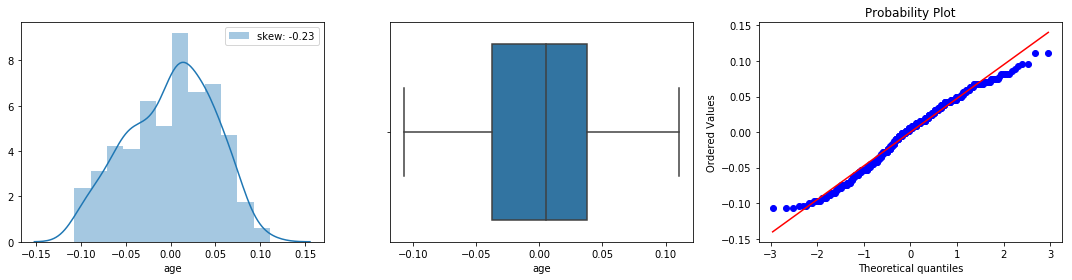

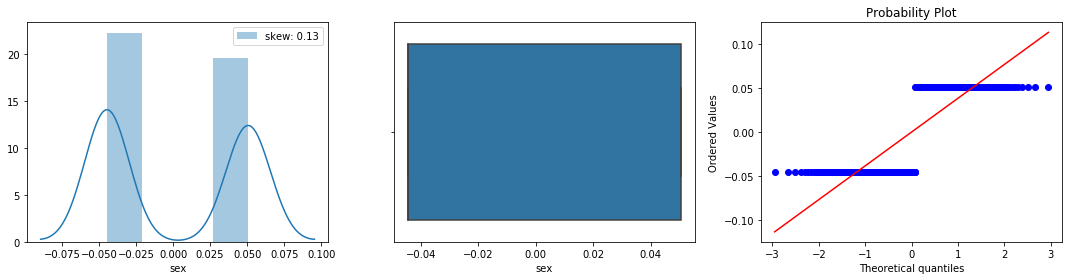

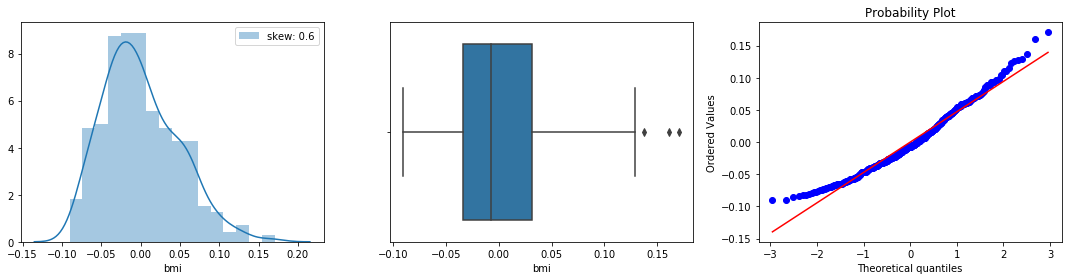

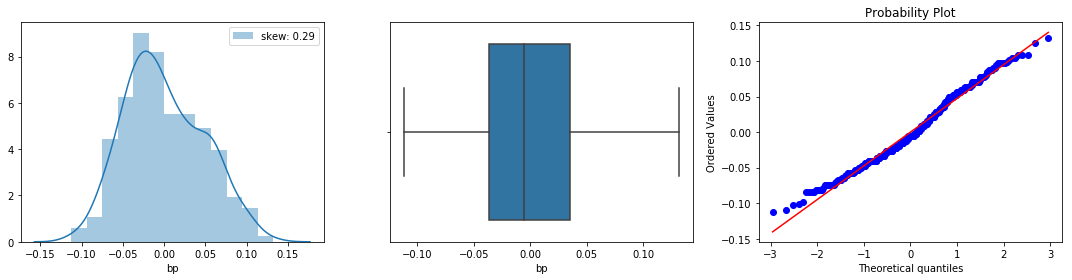

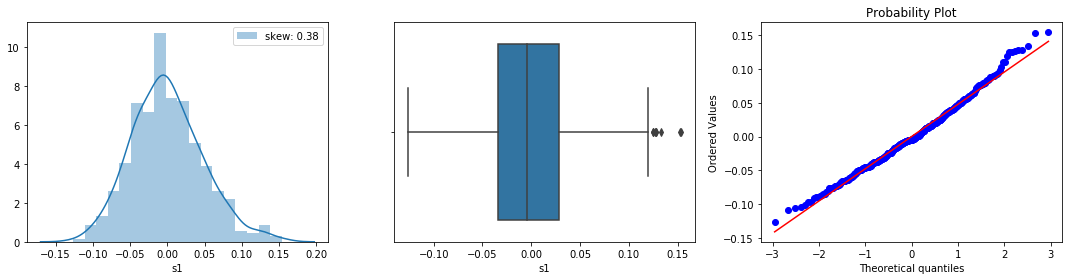

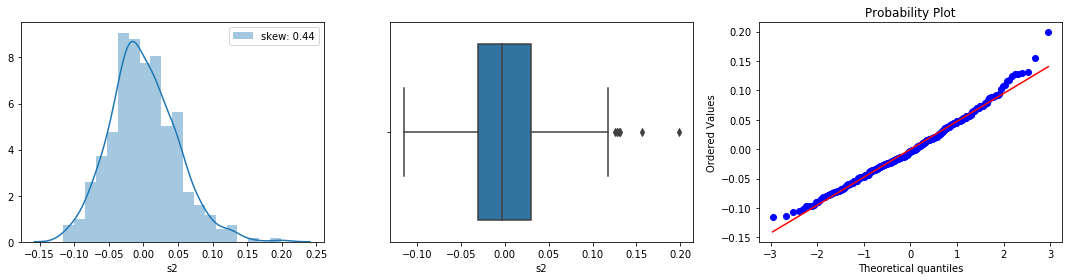

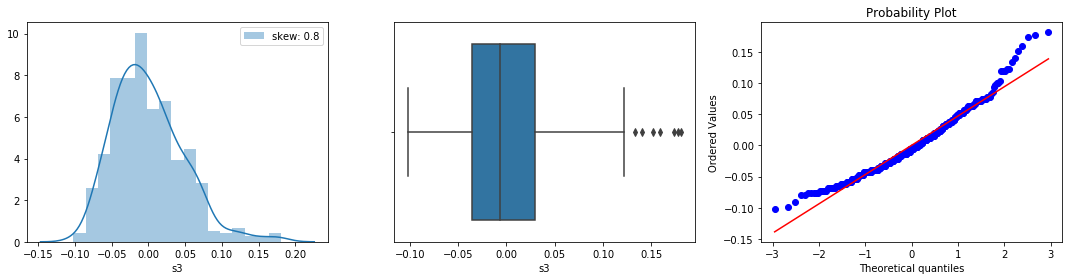

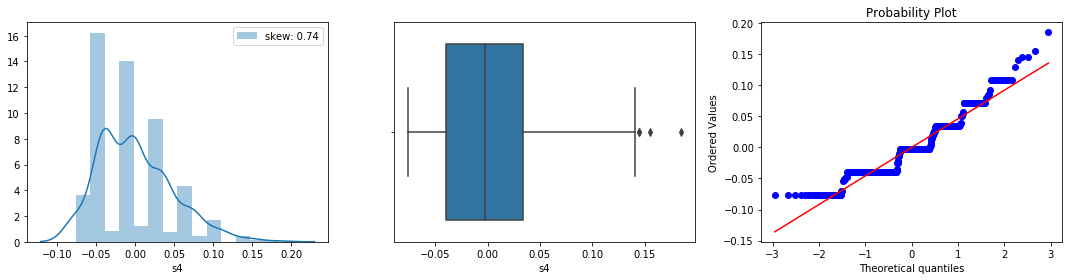

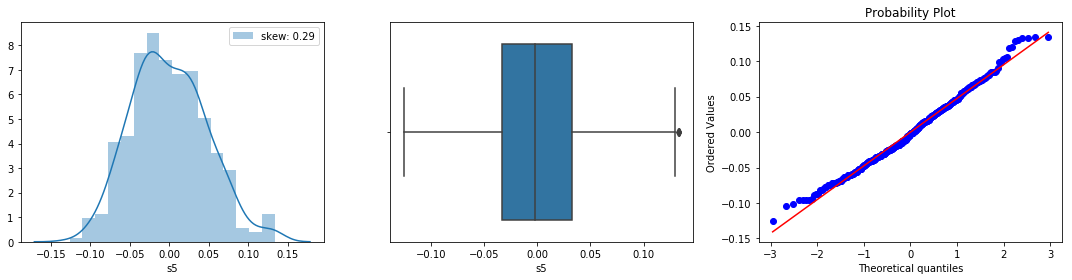

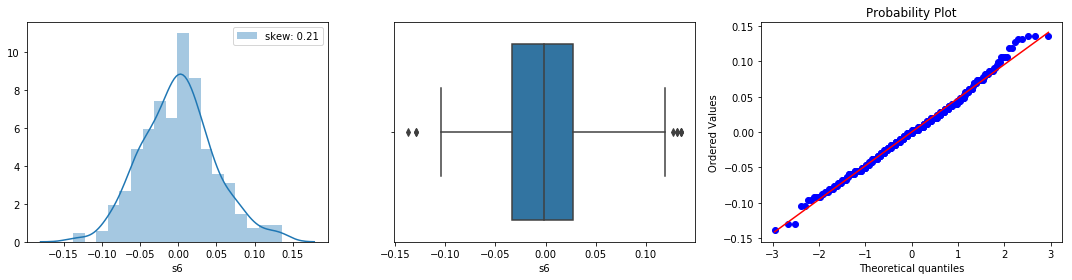

In [12]:
for col in dia.feature_names:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

## Z score capping

In [17]:
df_cap = df.copy()

In [18]:
def zscore_capping(df, cols, thr):
    
    for col in cols:
        
        mean = df[col].mean()
        std = df[col].std()
        
        upper_bound = mean + thr*std
        lower_bound = mean - thr*std
        
        df[col] = np.where(df[col]>upper_bound, upper_bound,
                 np.where(df[col]<lower_bound, lower_bound, df[col]))

In [21]:
np.round(df.describe(), 4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


In [22]:
zscore_capping(df_cap, dia.feature_names, 3)

In [24]:
np.round(df_cap.describe(), 4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0001,0.0000,-0.0000,-0.0002,-0.0003,-0.0001,-0.0000,-0.0000,152.1335
std,0.0476,0.0476,0.0473,0.0476,0.0475,0.0471,0.0466,0.0472,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1429,0.1320,0.1429,0.1429,0.1429,0.1429,0.1336,0.1356,346.0000


In [25]:
0 + 3*0.0476

0.1428

## Z score trimming

#### Keep it in mind, this method of using Z scores for capping/ trimming the outliers is valid ONLY if the particular feature is normally distributed

#### We should ideally split the dataset into training and testing and then apply the outlier engineering techniques only on the training set, because we want to keep the test set untouched until the very end.
#### But here, we'll assume that the entire data we have is our train set, and that we have a separate test set waiting for us

In [26]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [27]:
df_trim = df.copy()

In [32]:
def zscore_trim(df, cols, thr):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        mean = df[col].mean()
        std = df[col].std()
        
        upper_bound = mean + thr*std
        lower_bound = mean - thr*std
        
        s = df[col]
        
        indexes = s[(s>upper_bound) | (s<lower_bound)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
        
    return drop_outliers

In [31]:
s = df['s1']
s[(s>0.1429) | (s<-0.1429)].index

Int64Index([123, 230], dtype='int64')

In [33]:
dia.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [36]:
dropped = np.unique(zscore_trim(df_trim, dia.feature_names, 3))
dropped

array([ 58., 123., 216., 230., 256., 260., 261., 269., 322., 336., 367.,
       441.])

In [37]:
df_trim.drop(labels=dropped, inplace=True)

In [39]:
df.shape

(442, 11)

In [38]:
df_trim.shape

(430, 11)

In [40]:
12/442

0.027149321266968326